In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
validation_df['OurBid']=500
validation_df.head(5)
minBid=np.min(validation_df["bidprice"].values)
print("Min Bid is:",minBid)
maxBid=np.max(validation_df["bidprice"].values)
print("Max Bid is:",maxBid)

Min Bid is: 227
Max Bid is: 300


In [5]:
#custRange=x = np.linspace(minBid+1, maxBid+2, maxBid-minBid+1)
custRange=x = np.arange(minBid+1, maxBid+2,1)
#custRange=x = np.arange(minBid+30, maxBid-30)
#print(custRange)

In [6]:
CTRArray=[]
ImpressionsArray=[]
ClicksArray=[]
SpendArray=[]
CostPerClickArray=[]
CostPerMilleArray=[]

for ConstantBid in custRange:
    validation_df['OurBid']=ConstantBid
    trueValues = (validation_df["bidprice"]<validation_df["OurBid"])
    impressions = validation_df[trueValues].shape[0]
    clicks = np.sum(validation_df[trueValues]["click"].values)
    spend = np.sum(validation_df[trueValues]["bidprice"].values)
    CostPerClick = spend/clicks
    CostPerMille = spend*1000/(impressions)
    ClickThroughRate=(clicks*100)/impressions
    
    CTRArray.append(ClickThroughRate)
    ImpressionsArray.append(impressions)
    ClicksArray.append(clicks)
    SpendArray.append(spend)
    CostPerClickArray.append(CostPerClick)
    CostPerMilleArray.append(CostPerMille)

minCTR=np.min(CTRArray)
minImp=np.min(ImpressionsArray)
minClicks=np.min(ClicksArray)
minSpend=np.min(SpendArray)
minCPC=np.min(CostPerClickArray)
minCPM=np.min(CostPerMilleArray)
print(minCTR)

0.05565237767460934


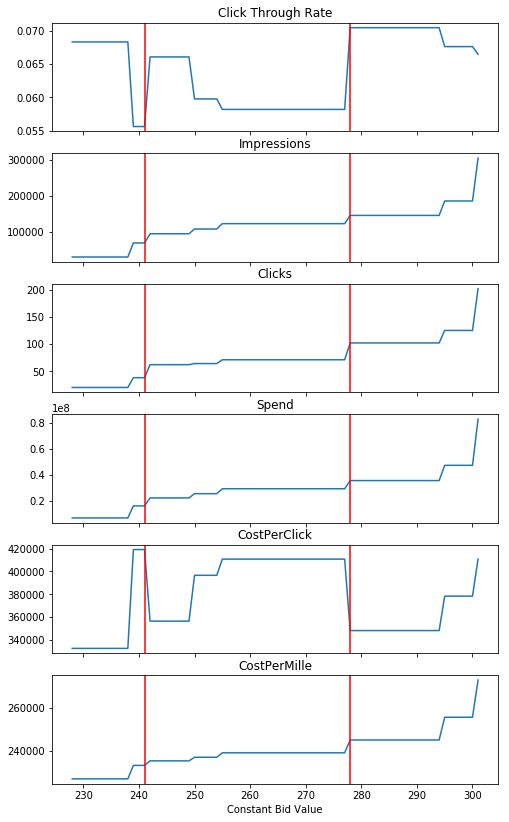

In [7]:
metrics = [CTRArray,ImpressionsArray,ClicksArray,SpendArray,CostPerClickArray,CostPerMilleArray]
metricNames = ['Click Through Rate','Impressions','Clicks','Spend','CostPerClick','CostPerMille']


f, axarr = plt.subplots(len(metrics), sharex=True, figsize=(8, 14))
#f.suptitle('Constant Bid Value')
i=0
for metric in metrics:
    #print(metric)
    axarr[i].plot(custRange, metric)
    axarr[i].set_title(metricNames[i])
    axarr[i].axvline(x=241,color='red')
    axarr[i].axvline(x=278,color='red')
    i+=1

axarr[i-1].set(xlabel="Constant Bid Value")
     
# Bring subplots close to each other.
f.subplots_adjust(wspace=0.3)
# Hide x labels and tick labels for all but bottom plot.
#for ax in axarr:
    #ax.label_outer()


We conclude that the best constant value to bid is 277 in terms of CTR. 242 is a reasonable value too as similar CTR and CPC are achieved. The choice between the two is mainly based on how much we would like to spend in total.

In [8]:
custRangeL=custRange.shape[0]
CTRArray2D=np.empty([custRangeL, custRangeL])
ImpressionsArray2D=np.empty([custRangeL, custRangeL])
ClicksArray2D=np.empty([custRangeL, custRangeL])
SpendArray2D=np.empty([custRangeL, custRangeL])
CostPerClickArray2D=np.empty([custRangeL, custRangeL])
CostPerMilleArray2D=np.empty([custRangeL, custRangeL])
#CostPerMilleArray2D[3][1]=5432100000000
#print(CostPerMilleArray2D)

In [9]:
print(custRange.shape[0])

74


In [10]:
print(custRange)
x=0
for minimumBid in custRange:
    y=custRangeL-1
    for maximumBid in custRange: #maxBid>minBid?????
        if maximumBid>minimumBid:
            validation_df['OurBid']=randint(minimumBid, maximumBid+1)
            trueValues = (validation_df["bidprice"]<validation_df["OurBid"])
            impressions = validation_df[trueValues].shape[0]
            clicks = np.sum(validation_df[trueValues]["click"].values)
            spend = np.sum(validation_df[trueValues]["bidprice"].values)
            CostPerClick = spend/clicks
            CostPerMille = spend*1000/(impressions)
            ClickThroughRate=(clicks*100)/impressions
        
        else:
            impressions = minImp*0.90
            clicks = minClicks*0.90
            spend = minSpend*0.90
            CostPerClick = minCPC*0.90
            CostPerMille = minCPM*0.90
            ClickThroughRate = minCTR*0.90
        

        CTRArray2D[y][x]=ClickThroughRate
        ImpressionsArray2D[y][x]=int(impressions)
        ClicksArray2D[y][x]=clicks
        SpendArray2D[y][x]=spend
        CostPerClickArray2D[y][x]=CostPerClick
        CostPerMilleArray2D[y][x]=CostPerMille
        #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
        #print("x=",x,"y=",y)
        y-=1
    x+=1


  

[228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301]


In [11]:
for n in range(1,10,1):  
    print("Randomisation ",n,"/9 being processed...")
    x=0
    for minimumBid in custRange:
        y=custRangeL-1
        for maximumBid in custRange: #maxBid>minBid?????
            if maximumBid>minimumBid:
                validation_df['OurBid']=randint(minimumBid, maximumBid+1)
                trueValues = (validation_df["bidprice"]<validation_df["OurBid"])
                impressions = validation_df[trueValues].shape[0]
                clicks = np.sum(validation_df[trueValues]["click"].values)
                spend = np.sum(validation_df[trueValues]["bidprice"].values)
                CostPerClick = spend/clicks
                CostPerMille = spend*1000/(impressions)
                ClickThroughRate=(clicks*100)/impressions

            else:
                impressions = minImp*0.90
                clicks = minClicks*0.90
                spend = minSpend*0.90
                CostPerClick = minCPC*0.90
                CostPerMille = minCPM*0.90
                ClickThroughRate = minCTR*0.90


            CTRArray2D[y][x]=(n*CTRArray2D[y][x]+ClickThroughRate)/(n+1)
            ImpressionsArray2D[y][x]=(n*ImpressionsArray2D[y][x]+int(impressions))/(n+1)
            ClicksArray2D[y][x]=(n*ClicksArray2D[y][x]+clicks)/(n+1)
            SpendArray2D[y][x]=(n*SpendArray2D[y][x]+spend)/(n+1)
            CostPerClickArray2D[y][x]=(n*CostPerClickArray2D[y][x]+CostPerClick)/(n+1)
            CostPerMilleArray2D[y][x]=(n*CostPerMilleArray2D[y][x]+CostPerMille)/(n+1)
            #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
            #print("x=",x,"y=",y)
            y-=1
        x+=1

Randomisation  1 /9 being processed...
Randomisation  2 /9 being processed...
Randomisation  3 /9 being processed...
Randomisation  4 /9 being processed...
Randomisation  5 /9 being processed...
Randomisation  6 /9 being processed...
Randomisation  7 /9 being processed...
Randomisation  8 /9 being processed...
Randomisation  9 /9 being processed...


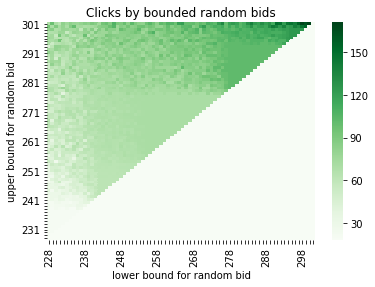

In [25]:
import seaborn as sns
ax = sns.heatmap(ClicksArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="Clicks by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()

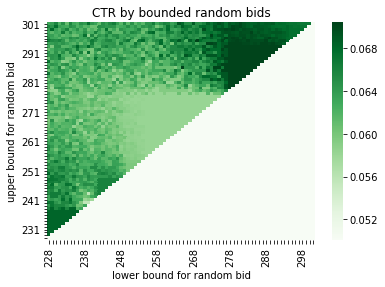

In [26]:
ax = sns.heatmap(CTRArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="CTR by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()

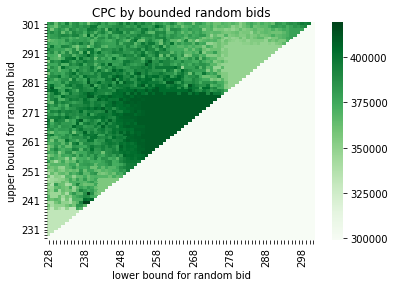

In [27]:
ax = sns.heatmap(CostPerClickArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="CPC by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()